In [54]:
# import libraries
import numpy as np
from numpy import median
from scipy import stats
from scipy.stats import normaltest
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import shapiro
from scipy.stats import kruskal
from scipy.stats import anderson
from scipy.stats import kendalltau
from scipy.stats import spearmanr
from scipy.stats import pearsonr
from statsmodels.stats.weightstats import ztest
from scipy.stats import boxcox
from scipy.stats import skew
from scipy.stats import anderson
import statsmodels.formula.api as smf  
from statsmodels.formula.api import ols          
from statsmodels.stats.anova import anova_lm
import statsmodels.stats.multicomp as multi 

# Import and suppress warnings
import warnings
warnings.filterwarnings('ignore')
import os

print(os.getcwd())

C:\Users\wooo_\OneDrive\Desktop\SUTD Notes\Data Validation and Statistical Analysis\Group Project


In [17]:
# Read the file
df1 = pd.read_csv(r"C:\Users\wooo_\OneDrive\Desktop\SUTD Notes\Data Validation and Statistical Analysis\Group Project\IBM Data.csv", header=0)
print(df1.shape)

(1470, 35)


In [18]:
df1.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'DailyRate'}>,
        <AxesSubplot:title={'center':'DistanceFromHome'}>,
        <AxesSubplot:title={'center':'Education'}>,
        <AxesSubplot:title={'center':'EmployeeCount'}>],
       [<AxesSubplot:title={'center':'EmployeeNumber'}>,
        <AxesSubplot:title={'center':'EnvironmentSatisfaction'}>,
        <AxesSubplot:title={'center':'HourlyRate'}>,
        <AxesSubplot:title={'center':'JobInvolvement'}>,
        <AxesSubplot:title={'center':'JobLevel'}>],
       [<AxesSubplot:title={'center':'JobSatisfaction'}>,
        <AxesSubplot:title={'center':'MonthlyIncome'}>,
        <AxesSubplot:title={'center':'MonthlyRate'}>,
        <AxesSubplot:title={'center':'NumCompaniesWorked'}>,
        <AxesSubplot:title={'center':'PercentSalaryHike'}>],
       [<AxesSubplot:title={'center':'PerformanceRating'}>,
        <AxesSubplot:title={'center':'RelationshipSatisfaction'}>,
        <AxesSubplot:title={'cen

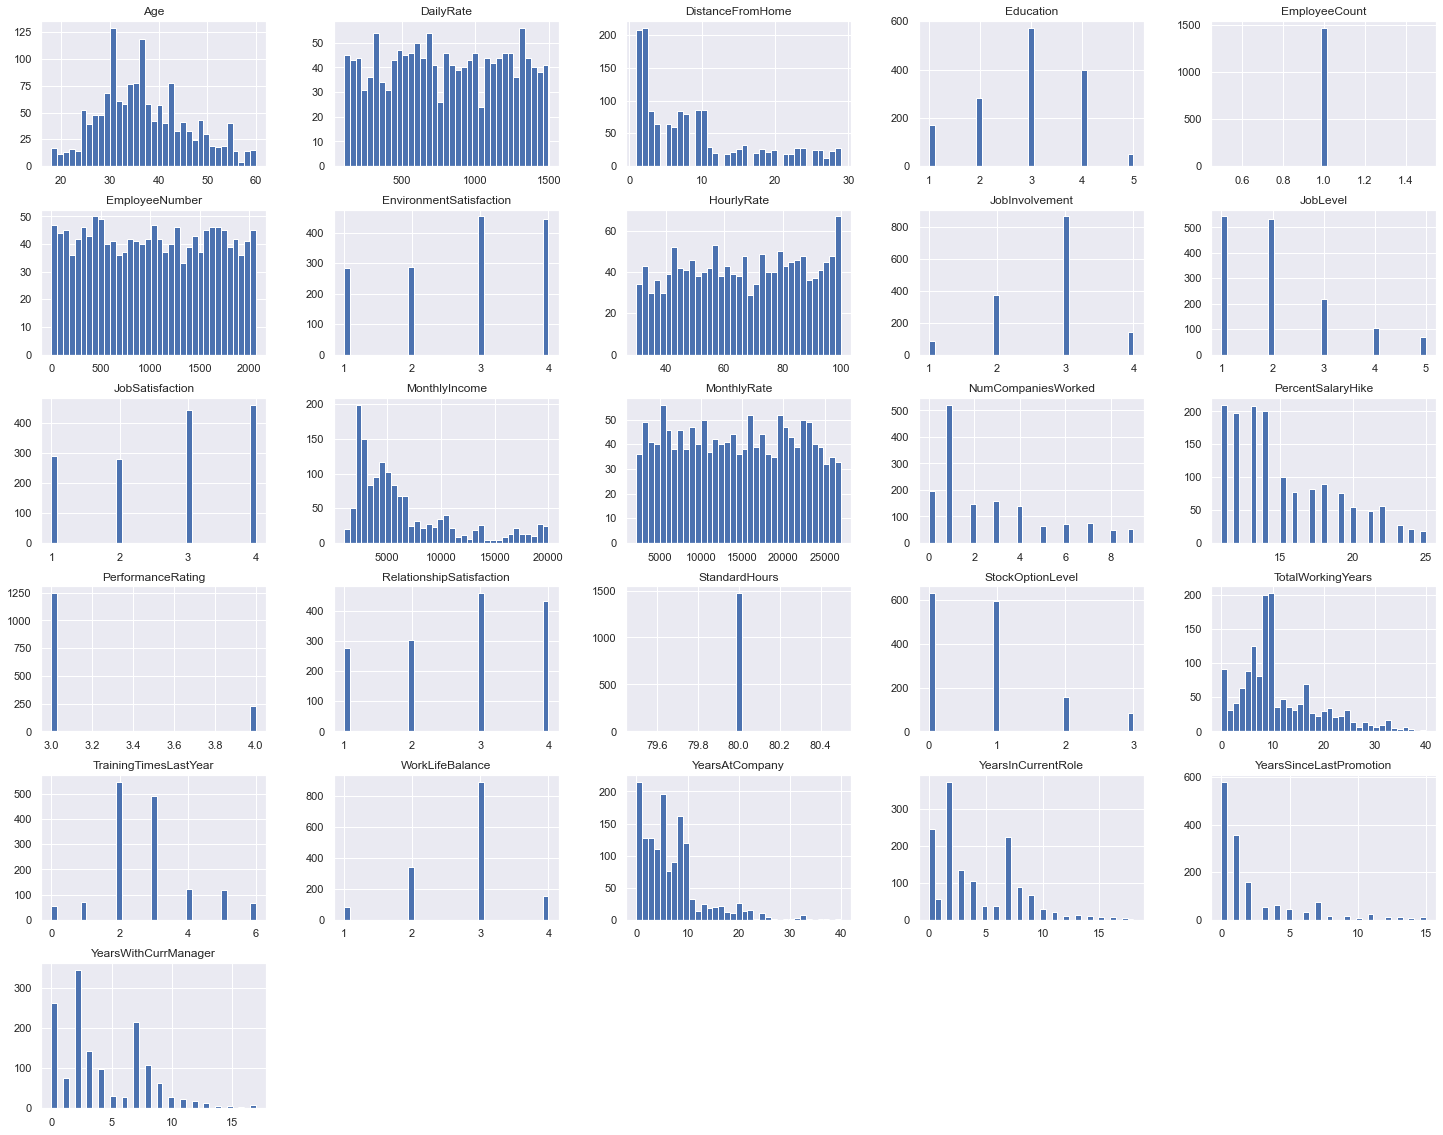

In [19]:
df1.hist(bins=35, figsize=(25, 20))

<AxesSubplot:title={'center':'MonthlyIncome'}, xlabel='MonthlyIncome', ylabel='Density'>

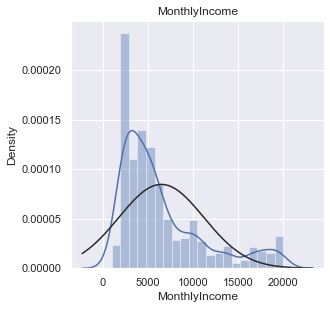

In [20]:
#histogram of monthly income

fig=plt.figure(figsize = (10, 10))

ax = plt.subplot(221)
ax.set_title('MonthlyIncome')
sns.distplot(df1['MonthlyIncome'],fit=stats.norm,kde=True)

In [21]:
###Initial Boxplot of Monthly Income with Outliers

<AxesSubplot:xlabel='MonthlyIncome'>

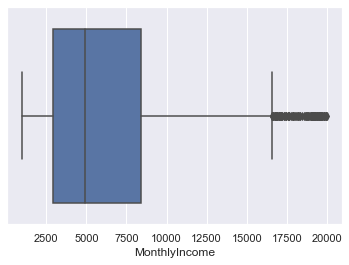

In [22]:
sns.boxplot(data=df1,x=df1['MonthlyIncome'])

#EDA to check beyond whiskers are outlier

In [23]:
###1st Round of removal outliers

In [24]:
Q1=df1['MonthlyIncome'].quantile(0.25)
Q3=df1['MonthlyIncome'].quantile(0.75)
IQR=Q3-Q1
print('The 1st Quartile:', Q1)
print('The 3rd Quartile:', Q3)
print('The IQR (50% between 1st to 3rd QR):', IQR)

Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
print('The Lower Whisker is : {} and Upper Whisker is {}'.format(Lower_Whisker, Upper_Whisker))

The 1st Quartile: 2911.0
The 3rd Quartile: 8379.0
The IQR (50% between 1st to 3rd QR): 5468.0
The Lower Whisker is : -5291.0 and Upper Whisker is 16581.0


<AxesSubplot:xlabel='MonthlyIncome'>

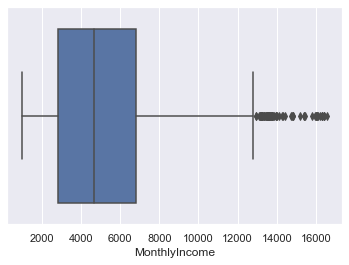

In [25]:
df1 = df1[df1['MonthlyIncome'] < Upper_Whisker]
sns.boxplot(data=df1,x=df1['MonthlyIncome'])

In [26]:
#2nd round of removal of outliers

In [27]:
Q1=df1['MonthlyIncome'].quantile(0.25)
Q3=df1['MonthlyIncome'].quantile(0.75)
IQR=Q3-Q1
print('The 1st Quartile:', Q1)
print('The 3rd Quartile:', Q3)
print('The IQR (50% between 1st to 3rd QR):', IQR)

Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
print('The Lower Whisker is : {} and Upper Whisker is {}'.format(Lower_Whisker, Upper_Whisker))


The 1st Quartile: 2813.25
The 3rd Quartile: 6811.25
The IQR (50% between 1st to 3rd QR): 3998.0
The Lower Whisker is : -3183.75 and Upper Whisker is 12808.25


<AxesSubplot:xlabel='MonthlyIncome'>

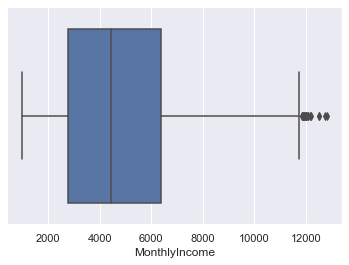

In [28]:
df1 = df1[df1['MonthlyIncome'] < Upper_Whisker]
sns.boxplot(data=df1,x=df1['MonthlyIncome'])

In [29]:
#3rd round of removal of outliers

In [30]:
Q1=df1['MonthlyIncome'].quantile(0.25)
Q3=df1['MonthlyIncome'].quantile(0.75)
IQR=Q3-Q1
print('The 1st Quartile:', Q1)
print('The 3rd Quartile:', Q3)
print('The IQR (50% between 1st to 3rd QR):', IQR)

Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
print('The Lower Whisker is : {} and Upper Whisker is {}'.format(Lower_Whisker, Upper_Whisker))

The 1st Quartile: 2773.5
The 3rd Quartile: 6390.5
The IQR (50% between 1st to 3rd QR): 3617.0
The Lower Whisker is : -2652.0 and Upper Whisker is 11816.0


<AxesSubplot:xlabel='MonthlyIncome'>

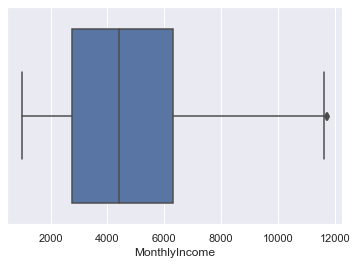

In [31]:
df1 = df1[df1['MonthlyIncome'] < Upper_Whisker]
sns.boxplot(data=df1,x=df1['MonthlyIncome'])

In [32]:
#4th round of outliers removal

In [33]:
Q1=df1['MonthlyIncome'].quantile(0.25)
Q3=df1['MonthlyIncome'].quantile(0.75)
IQR=Q3-Q1
print('The 1st Quartile:', Q1)
print('The 3rd Quartile:', Q3)
print('The IQR (50% between 1st to 3rd QR):', IQR)

Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
print('The Lower Whisker is : {} and Upper Whisker is {}'.format(Lower_Whisker, Upper_Whisker))

The 1st Quartile: 2759.25
The 3rd Quartile: 6318.0
The IQR (50% between 1st to 3rd QR): 3558.75
The Lower Whisker is : -2578.875 and Upper Whisker is 11656.125


<AxesSubplot:xlabel='MonthlyIncome'>

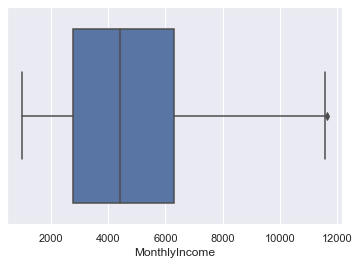

In [34]:
df1 = df1[df1['MonthlyIncome'] < Upper_Whisker]
sns.boxplot(data=df1,x=df1['MonthlyIncome'])

In [35]:
#5th round of outliers removal

In [36]:
Q1=df1['MonthlyIncome'].quantile(0.25)
Q3=df1['MonthlyIncome'].quantile(0.75)
IQR=Q3-Q1
print('The 1st Quartile:', Q1)
print('The 3rd Quartile:', Q3)
print('The IQR (50% between 1st to 3rd QR):', IQR)

Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
print('The Lower Whisker is : {} and Upper Whisker is {}'.format(Lower_Whisker, Upper_Whisker))

The 1st Quartile: 2758.25
The 3rd Quartile: 6297.0
The IQR (50% between 1st to 3rd QR): 3538.75
The Lower Whisker is : -2549.875 and Upper Whisker is 11605.125


<AxesSubplot:xlabel='MonthlyIncome'>

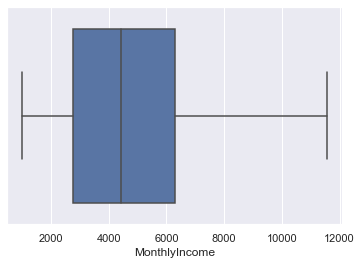

In [37]:
df1 = df1[df1['MonthlyIncome'] < Upper_Whisker]
sns.boxplot(data=df1,x=df1['MonthlyIncome'])

<AxesSubplot:title={'center':'MonthlyIncome'}, xlabel='MonthlyIncome', ylabel='Density'>

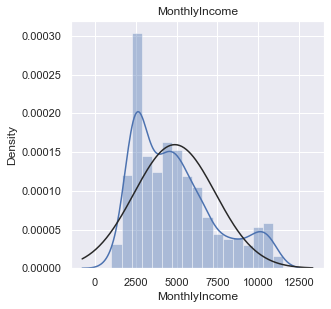

In [38]:
#replotting of histogram after outliers removal

fig=plt.figure(figsize = (10, 10))

ax = plt.subplot(221)
ax.set_title('MonthlyIncome')
sns.distplot(df1['MonthlyIncome'],fit=stats.norm,kde=True)

In [39]:
#trying out different methods of data transformation to best fit the data

#mi_data = boxcox(df1['MonthlyIncome'], 0.5)

#x = df1['MonthlyIncome']
#normalizing = x/np.sqrt((x**2).sum())
#mi_data = normalizing

#sqrtx_Resale =  df1['MonthlyIncome']
#sqrtx_Resale = np.sqrt(sqrtx_Resale)

log_monthlyincome = np.log10(df1['MonthlyIncome'])

#log2_Resale = np.log10(np.log10(df1['MonthlyIncome']))

#log3_Resale = np.log10(np.log10(np.log10(df1['MonthlyIncome'])))

mi_data = log_monthlyincome

<AxesSubplot:title={'center':'mi_data'}, xlabel='MonthlyIncome', ylabel='Density'>

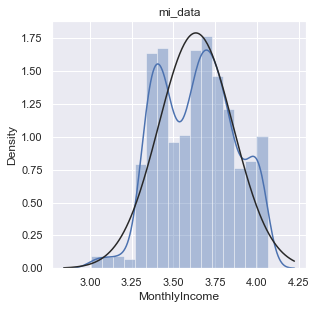

In [40]:
fig=plt.figure(figsize = (10, 10))

ax = plt.subplot(221)
ax.set_title('mi_data')
sns.distplot(mi_data,fit=stats.norm,kde=True)

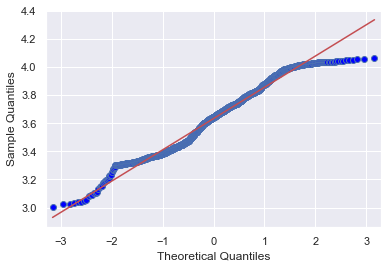

In [41]:
#to visualise the data as a QQ plot

import statsmodels.api as sm
import matplotlib.pyplot as plt

fig = sm.qqplot(mi_data, line='s')
plt.show()


In [42]:
#can visually conclude that Monthly Income after transformation looks approximately normally distributed.

In [44]:
#perform Shapiro-Wilk test

stat, p = shapiro(mi_data)

print('stat=%.2f, p=%.2f' % (stat, p))

if p > 0.05:
    print('Normal distribution')
else:

    print('Not a normal distribution')

stat=0.98, p=0.00
Not a normal distribution


In [45]:
sample = mi_data.sample(n=29, random_state=1)
#print(sample)

stat, p = normaltest(sample)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Normal distribution')
else:
	print('Not a normal distribution')

Statistics=2.965, p=0.227
Normal distribution


In [46]:
stat, p = normaltest(mi_data)         ## D'Agostino's K^2 Normality Test

print('stat=%.2f, p=%.2f' % (stat, p))
if p > 0.05:
    print('Approximately Normally Distributed')
else:
    print('Not Approximately Normally Distributed')

stat=74.41, p=0.00
Not Approximately Normally Distributed


In [47]:
sample2 = mi_data.sample(n=29, random_state=1)

stat, p = normaltest(sample2)         ## D'Agostino's K^2 Normality Test

print('stat=%.2f, p=%.2f' % (stat, p))
if p > 0.05:
    print('Approximately Normally Distributed')
else:
    print('Not Approximately Normally Distributed')

stat=2.97, p=0.23
Approximately Normally Distributed


In [49]:
result = anderson(mi_data)

print('stat=%.2f' % (result.statistic))
for i in range(len(result.critical_values)):
    significance_level, critical_Value = result.significance_level[i], result.critical_values[i]
    if result.statistic < critical_Value:
        print('Approximately Normally Distributed at %.2f%% level' % (significance_level))
    else:
        print('Not Approximately Normally Distributed %.2f%% level' % (significance_level))

stat=8.08
Not Approximately Normally Distributed 15.00% level
Not Approximately Normally Distributed 10.00% level
Not Approximately Normally Distributed 5.00% level
Not Approximately Normally Distributed 2.50% level
Not Approximately Normally Distributed 1.00% level


In [50]:
sample3 = mi_data.sample(n=29, random_state = 1)

from scipy.stats import anderson
result = anderson(sample3)

print('stat=%.2f' % (result.statistic))
for i in range(len(result.critical_values)):
    significance_level, critical_Value = result.significance_level[i], result.critical_values[i]
    if result.statistic < critical_Value:
        print('Approximately Normally Distributed at %.2f%% level' % (significance_level))
    else:
        print('Not Approximately Normally Distributed %.2f%% level' % (significance_level))

stat=0.42
Approximately Normally Distributed at 15.00% level
Approximately Normally Distributed at 10.00% level
Approximately Normally Distributed at 5.00% level
Approximately Normally Distributed at 2.50% level
Approximately Normally Distributed at 1.00% level


Paired T_test

In [52]:
(test_statistic, p_value) = stats.ttest_rel(df1.MonthlyIncome[0:499],df1.MonthlyIncome[500:999], nan_policy='omit')
print("The test statistic is: ", round(test_statistic,5))
print("The p-value is: ", round(p_value,5))


if p_value > 0.05:
    print('Subject(s) is likely the same distribution')
else:
    print('Subject(s) is likely different distributions')

The test statistic is:  0.00308
The p-value is:  0.99755
Subject(s) is likely the same distribution


In [149]:
#count values
df1['Gender'].value_counts()

Male      770
Female    493
Name: Gender, dtype: int64

In [166]:
df2 = df1.pivot(columns='Gender', values='MonthlyIncome')
df2 = df2.apply(lambda x: pd.Series(x.dropna().values))
print(df2)

Gender  Female    Male
0       5993.0  5130.0
1       2909.0  2090.0
2       2670.0  3468.0
3       4193.0  3068.0
4       9980.0  2693.0
..         ...     ...
765        NaN  2571.0
766        NaN  9991.0
767        NaN  6142.0
768        NaN  5390.0
769        NaN  4404.0

[770 rows x 2 columns]


The test statistic is:  1.86
The p-value is:  0.17


<AxesSubplot:xlabel='Gender'>

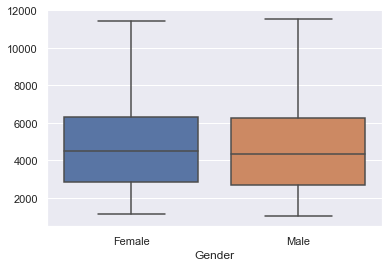

In [167]:
(test_statistic, p_value) = stats.bartlett(df2['Female'],df2['Male'])
print("The test statistic is: ", round(test_statistic,2))
print("The p-value is: ", round(p_value,2))

#Since p-value: 0.17 > 0.05, we fail to reject the null hypothesis
#conclude the variances(incomes of both genders) are similar
#sometimes visual like boxplot display will help

sns.boxplot(data=df2)

#boxplot helps to conclude that the variance is similar

In [55]:
#using anova test to confirm hypothesis

model = smf.ols('MonthlyIncome ~ C(Gender)', data=df1).fit()  
aov_table = anova_lm(model, typ=2)

print(aov_table)

                 sum_sq      df         F    PR(>F)
C(Gender)  1.106419e+06     1.0  0.176648  0.674342
Residual   7.898178e+09  1261.0       NaN       NaN


In [56]:
mcTreatment    = multi.MultiComparison(df1['MonthlyIncome'], df1['Gender'])
#Blood pressure is RV/DV whilst Treatment is the IV
#after passing the multi comparison table we need to pass it to Tukey HSD

results_Treatment  = mcTreatment.tukeyhsd()  #tukey will do multiple comparison
print(results_Treatment.summary())

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj    lower    upper   reject
-------------------------------------------------------
Female   Male -60.6726 0.6853 -343.8796 222.5343  False
-------------------------------------------------------


## What does the above table mean?
> the family wise error rate is 0.05 (aka FWER) as default
> p-value : 0.6853
> Test is run in group 1 vs group 2: <br>
    > - permutation: Female vs Male shows reject as False<br>
    > - this means they are not significantly different as we fail to reject null hypo<br>
    > - the confidence interval is -343.8796 to 222.5343, which includes 0 value, which implies its not significantly different <br>
